<a href="https://colab.research.google.com/github/khushee-g/EEG/blob/main/Updated_Model_10_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [335]:
import numpy as np # Linear algebra
import pandas as pd
# ModelLing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [336]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Read in data as a dataframe
data1 = pd.read_csv('/content/Sheet 1-1-EEG.psychiatric control & behvaior.csv')

In [337]:
data1.shape
data1.head(2)

,no.,sex,age,eeg.date,education,IQ,main_disorder,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.A.delta.i.C3.p.P4,COH.A.delta.i.C3.q.T6,COH.A.delta.i.C3.r.O1,COH.A.delta.i.C3.s.O2,COH.A.delta.j.Cz.k.C4,COH.A.delta.j.Cz.l.T4,COH.A.delta.j.Cz.m.T5,COH.A.delta.j.Cz.n.P3,COH.A.delta.j.Cz.o.Pz,COH.A.delta.j.Cz.p.P4
0,114,F,34.16,2018.6.29,18.0,119.0,4,4,72.431249,69.386059,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,115,F,42.35,2018.6.29,16.0,110.0,4,4,19.579138,19.703305,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444


In [382]:
Y = data1['specific_disorder']
X = data1.loc[:,'AB.A.delta.a.FP1':]
Y

,specific_disorder
0,4
1,4
2,4
3,4
4,4
...,...
183,5
184,5
185,5
186,5


In [383]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data2 = imp_mean.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 122']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [384]:
#print(type(data2))
#print(data2.shape)
data = pd.DataFrame(data2)
X=data
#print(data.head(5))


Y

,specific_disorder
0,4
1,4
2,4
3,4
4,4
...,...
183,5
184,5
185,5
186,5


In [385]:
#come back

data.shape
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
0,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,41.658465,55.851042,56.265661,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,14.458573,13.843582,19.761720,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444


In [391]:
Y=Y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(152, 246)
(38, 246)
(152,)
(38,)


In [392]:
import random
random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.5526315789473685


In [393]:
#prediction after fixing class imbalance

from imblearn.over_sampling import RandomOverSampler
Y=y.astype('str')
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X, Y = oversampler.fit_resample(data2, Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

(152, 246)
(38, 246)
(152,)
(38,)
Accuracy: 0.5789473684210527


In [394]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[12,  8],
       [ 8, 10]])

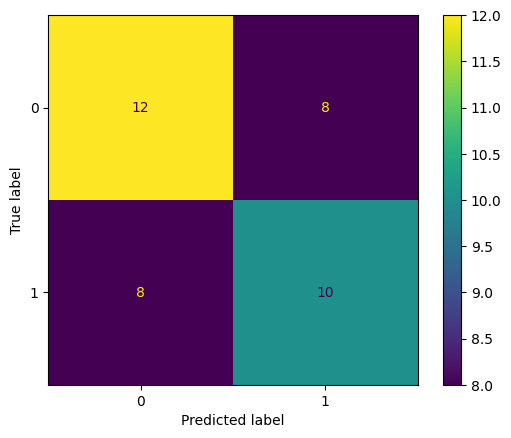

In [397]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

y_test_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();



,specific_disorder
0,4
1,4
2,4
3,4
4,4
...,...
185,5
186,5
187,5
188,5
